In [2]:
import pandas as pd
import numpy as np
import pandas.io.sql as pd_sql
import sqlite3 as sql
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib notebook

In [3]:
con = sql.connect(r'c:\users\rebecca\.spyder-py3\movies.db') 

movies = pd_sql.read_sql('select * from finalMovies_20180804', con, index_col='index')


In [4]:
movies['Revenue'].count()
movies['Length'].count() #quick way to get rid of all remaining potential duplicates
movies['Budget'].count()
#movies[(movies['Budget']>0) & (movies['Length']>0)].count()

4662

In [5]:
#Explore data with a non-null profit
test = movies[pd.notna(movies['Profit_Bucket'])]
##Option to restrict data to movies making at least $100,000
#test = movies[(movies['Revenue_Real'])>100000]

#Make binary variable where 0 if profit bucket is <1 or 1-2.
#Make 1 if profit bucket greater
test['Profit_Bucket_Binary']=np.where(test['Profit_Bucket']=='<1x', 0, np.where(test['Profit_Bucket']=='[1-2x)', \
    0, np.where(test['Profit_Bucket']=='[2-3x)', 1, np.where(test['Profit_Bucket']=='[3-4x)', \
                       1, np.where(test['Profit_Bucket']=='[4-5x)', 1, np.where(test['Profit_Bucket']=='>=5x', 1, ''))))))

#Experiment: Make second binary variable where 0 if profit bucket is <1.
#Make 1 if profit bucket greater
test['Profit_Bucket_Binary2']=np.where(test['Profit_Bucket']=='<1x', 0, np.where(test['Profit_Bucket']=='[1-2x)', \
    1, np.where(test['Profit_Bucket']=='[2-3x)', 1, np.where(test['Profit_Bucket']=='[3-4x)', \
                       1, np.where(test['Profit_Bucket']=='[4-5x)', 1, np.where(test['Profit_Bucket']=='>=5x', 1, ''))))))


C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [6]:
test.describe()

,movieId,tmdbId,Rating_MovieLens,Year,imdbVotes,Rating_RT,Revenue,Length,Budget,Movie_VoteAvg,...,Comp_WarnerBros,Comp_Other,Revenue_Actor,Revenue_Actor_Real,Revenue_Director,Revenue_Director_Real,Revenue_Writer,Revenue_Writer_Real,Revenue_Producer,Revenue_Producer_Real
count,3.905000e+03,3.905000e+03,3902.000000,4661.000000,4.175000e+03,4002.000000,4.661000e+03,4198.000000,4.661000e+03,3934.000000,...,4661.000000,4661.000000,3.849000e+03,3.849000e+03,2.274000e+03,2.274000e+03,2.448000e+03,2.448000e+03,2.498000e+03,2.498000e+03
mean,6.413329e+04,7.786241e+04,57.989963,2007.050633,8.690515e+04,51.109945,8.901864e+07,105.466532,3.262564e+07,6.125712,...,0.120360,0.893371,2.432235e+09,3.197345e+09,3.496223e+08,4.662014e+08,8.423745e+08,1.077952e+09,1.242434e+09,1.615668e+09
std,6.767958e+04,1.112989e+05,3425.685749,6.358362,1.419620e+05,27.561867,1.769540e+08,17.444264,4.137186e+07,1.087297,...,0.325417,0.308675,2.694647e+09,3.361653e+09,5.972923e+08,7.806719e+08,2.250932e+09,2.676941e+09,1.823527e+09,2.280280e+09
min,1.000000e+00,5.000000e+00,0.630000,1995.000000,6.000000e+00,0.000000,1.000000e+00,4.000000,1.000000e+00,0.000000,...,0.000000,0.000000,1.000000e+00,1.646043e+00,2.000000e+00,2.972239e+00,1.000000e+00,1.210501e+00,2.000000e+00,2.972239e+00
25%,5.501000e+03,9.722000e+03,2.821805,2002.000000,1.076200e+04,27.000000,3.428048e+06,93.000000,6.000000e+06,5.578861,...,0.000000,1.000000,4.933336e+08,6.996371e+08,2.514060e+07,3.443460e+07,4.436449e+07,6.005541e+07,1.218002e+08,1.691824e+08
50%,5.804700e+04,1.847600e+04,3.176186,2007.000000,3.670700e+04,51.000000,2.526904e+07,103.000000,1.812500e+07,6.153667,...,0.000000,1.000000,1.556155e+09,2.136539e+09,1.282660e+08,1.756283e+08,2.137190e+08,2.891916e+08,5.185102e+08,7.225787e+08
75%,1.038080e+05,1.011730e+05,3.496178,2013.000000,9.786150e+04,76.000000,9.377252e+07,115.000000,4.000000e+07,6.719017,...,0.000000,1.000000,3.482726e+09,4.599703e+09,4.104515e+08,5.583237e+08,7.696846e+08,1.044681e+09,1.553800e+09,2.064103e+09
max,2.120338e+06,2.023923e+06,213992.000000,2018.000000,1.911376e+06,100.000000,2.787965e+09,242.000000,3.876500e+08,45.000000,...,1.000000,1.000000,2.235140e+10,2.476678e+10,5.619555e+09,7.075528e+09,4.621335e+10,5.015983e+10,1.902851e+10,2.242432e+10


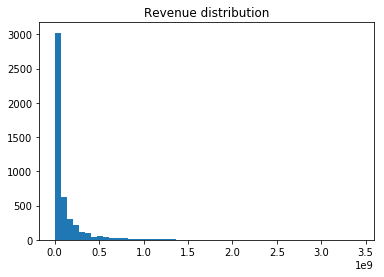

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(test['Revenue_Real'], bins=50)
plt.title('Revenue distribution')
plt.show()

<IPython.core.display.Javascript object>


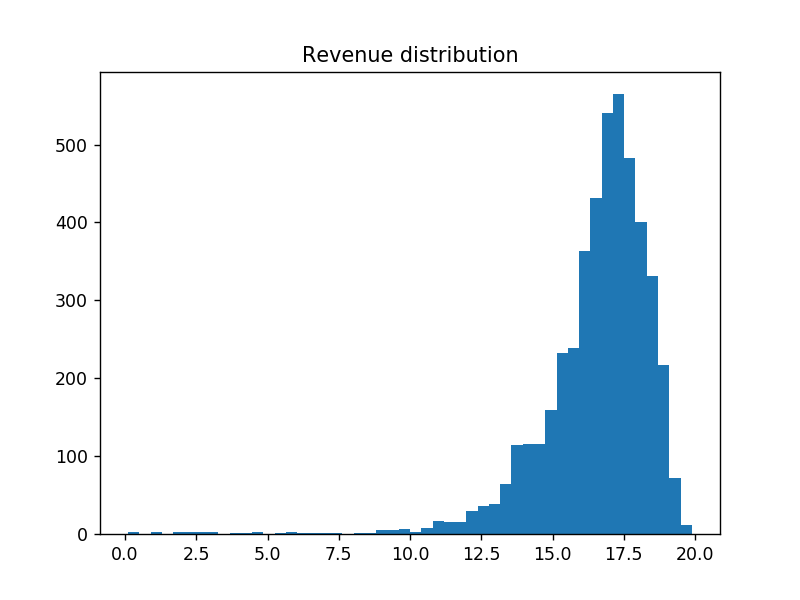

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(np.log(test['Budget_Real']), bins=50) #log=True
plt.title('Revenue distribution')
plt.show()

In [21]:
test[['Date', 'Name', 'Revenue_Real']].sort_values(by='Revenue_Real', ascending=False).head(10)

,Date,Name,Revenue_Real
index,,,
5700,1997-11-18 00:00:00,titanic,3.425755e+09
2593,2009-12-10 00:00:00,avatar,3.217806e+09
734,2015-12-15 00:00:00,star wars: the force awakens,2.181537e+09
33,2018-04-27 00:00:00,avengers: infinity war,2.050780e+09
904,2015-06-06 00:00:00,jurassic world,1.764854e+09
2052,2012-04-25 00:00:00,the avengers,1.663235e+09
963,2015-04-01 00:00:00,furious 7,1.613204e+09
5420,1999-05-19 00:00:00,star wars ep. i: the phantom menace,1.552056e+09
4367,2003-12-01 00:00:00,the lord of the rings: the return of the king,1.543553e+09


(6135, 86)


<IPython.core.display.Javascript object>


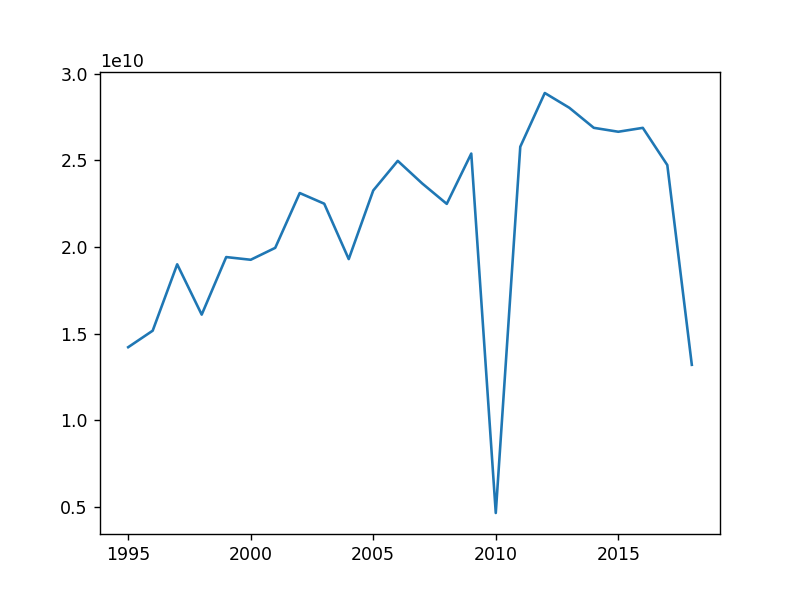

In [49]:
%matplotlib notebook
test2 = movies[(movies['Revenue_Real']>0)]# & (test['Length']>0)]
print(test2.shape)
plot_rev = test2.groupby(['Year'])['Revenue_Real'].agg('sum')
#list(plot_rev)
plt.plot(plot_rev )
#print(plot_rev)


<IPython.core.display.Javascript object>


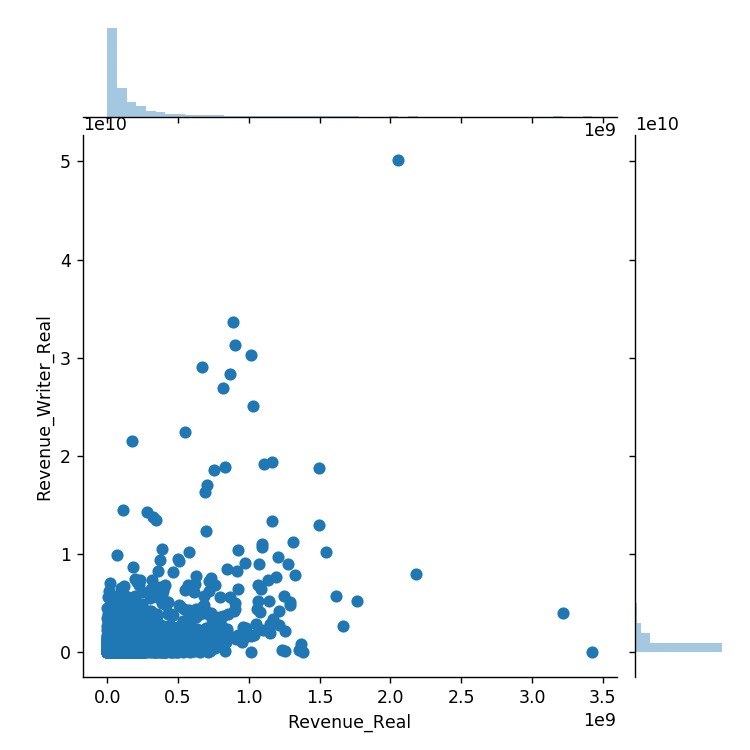

In [45]:
g = sns.jointplot("Revenue_Real", "Revenue_Writer_Real", test)

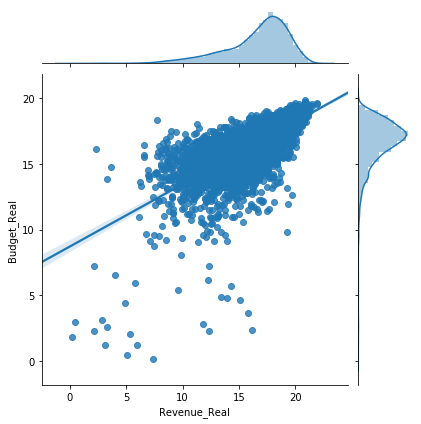

In [8]:
g = sns.jointplot(x=np.log(test["Revenue_Real"]), 
                  y=np.log(test["Budget_Real"]), kind='reg',data=test)

<IPython.core.display.Javascript object>


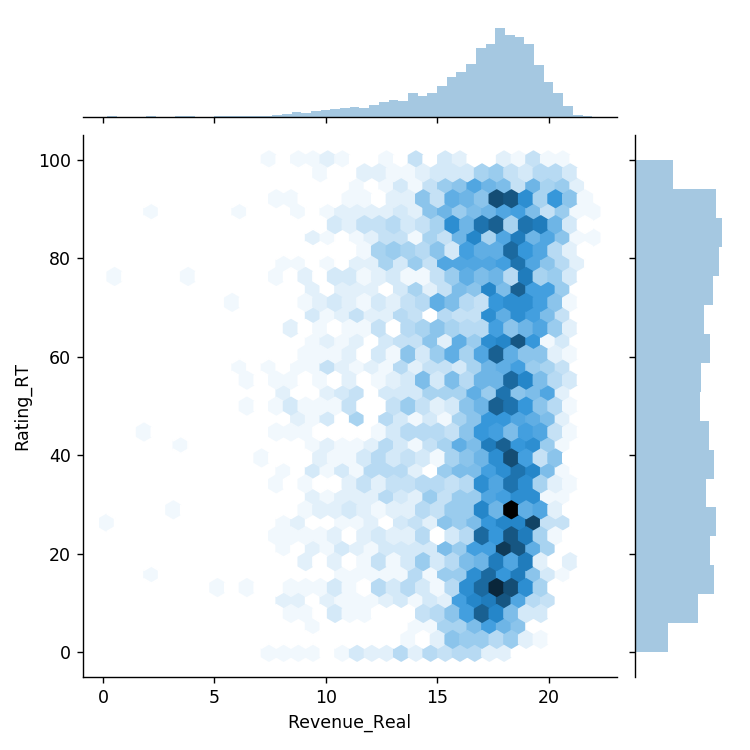

In [78]:
g = sns.jointplot(x=np.log(test['Revenue_Real']), 
                  y=test['Rating_RT'],# y=np.log(test['Revenue_Actor_Real']), 
                  kind='hex', data=test)

<IPython.core.display.Javascript object>


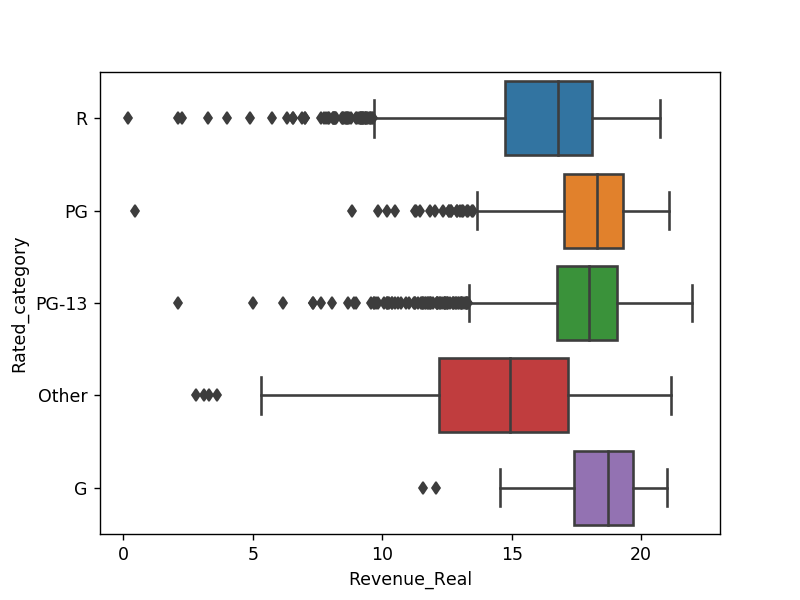

In [79]:
ax = sns.boxplot(x=np.log(test["Revenue_Real"]), y=test['Rated_category'])

<IPython.core.display.Javascript object>


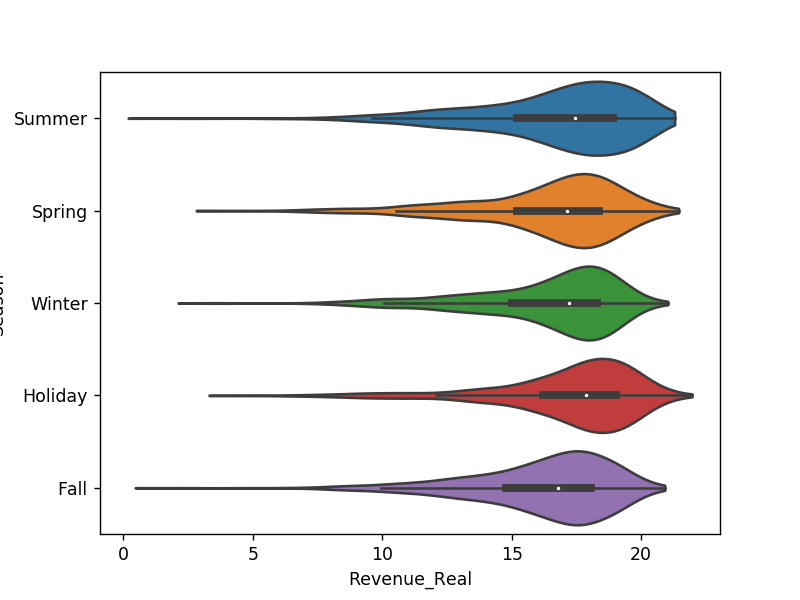

In [82]:
ax = sns.violinplot(x=np.log(test["Revenue_Real"]), y=test['Season'],scale="width", cut=0)

<IPython.core.display.Javascript object>


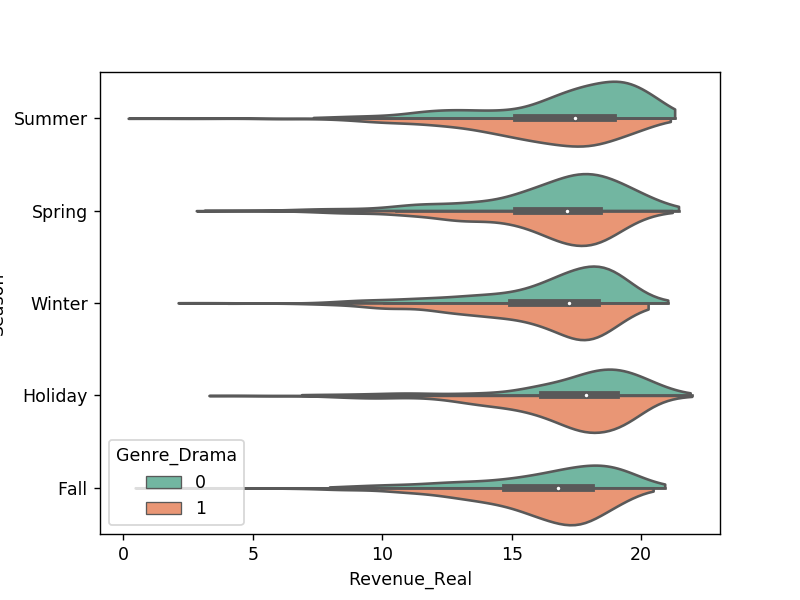

In [83]:
ax = sns.violinplot(x=np.log(test["Revenue_Real"]), y=test["Season"], hue=test['Genre_Drama'],cut=0, 
                    palette="Set2", split=True,scale="count")

<IPython.core.display.Javascript object>


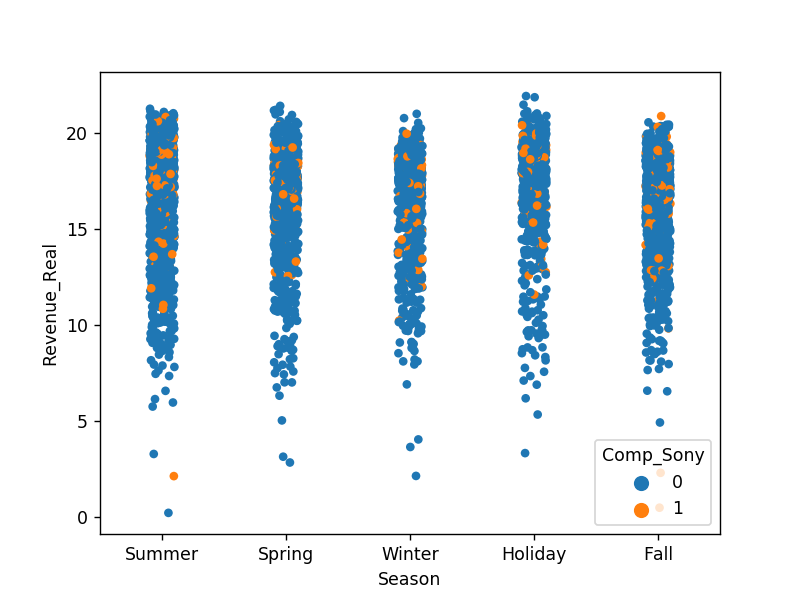

In [84]:
#ax = sns.stripplot(x=test["Season"], y=test["Revenue_Real"], hue=test["Rated_category"],  jitter=True)
ax = sns.stripplot(x=test["Season"], y=np.log(test["Revenue_Real"]), hue=test["Comp_Sony"],  jitter=True)

<IPython.core.display.Javascript object>


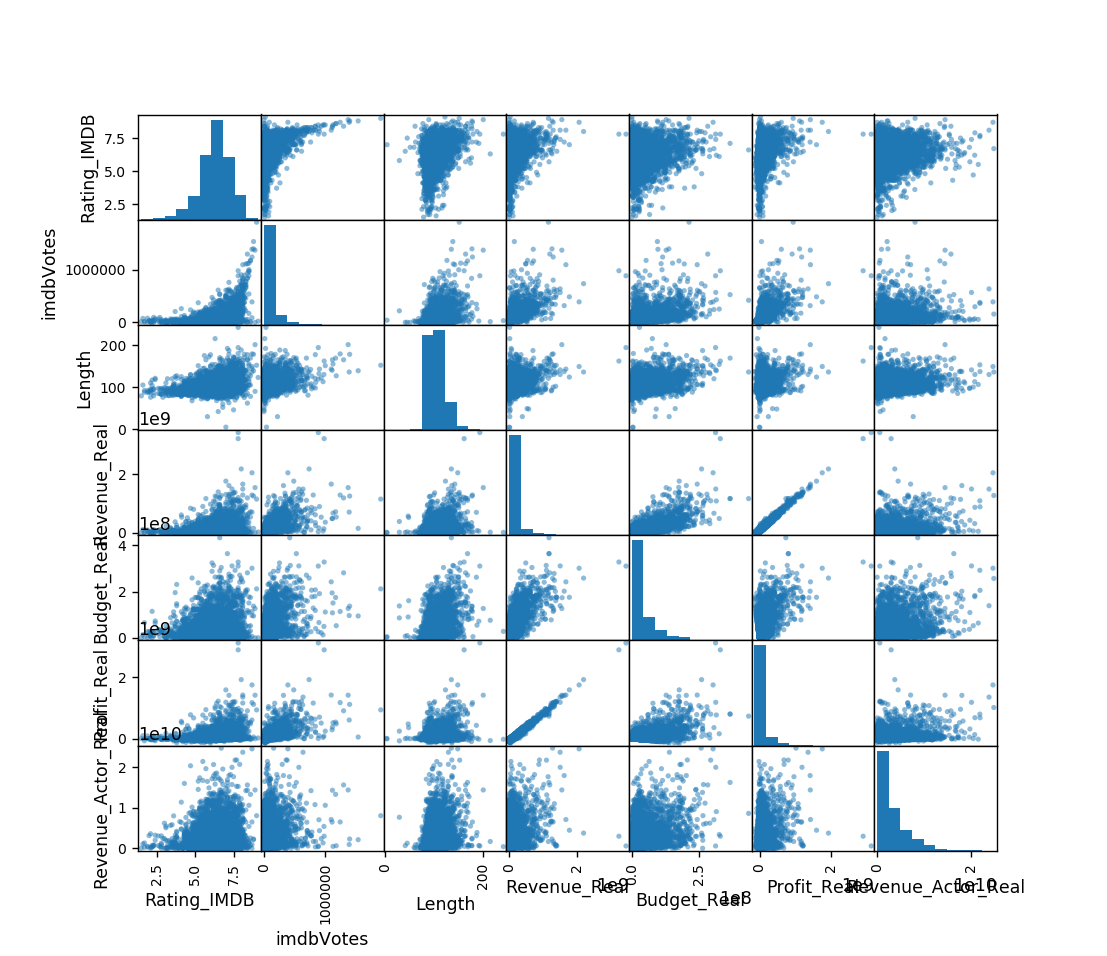

In [71]:
sample = test[['Rating_IMDB',  'imdbVotes', \
               'Length', 'Revenue_Real', 'Budget_Real', \
               'Profit_Real', 'Season', 'Revenue_Actor_Real']]
scatter_matrix(sample, figsize=(10,10))
plt.show()

C:\Users\Rebecca\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


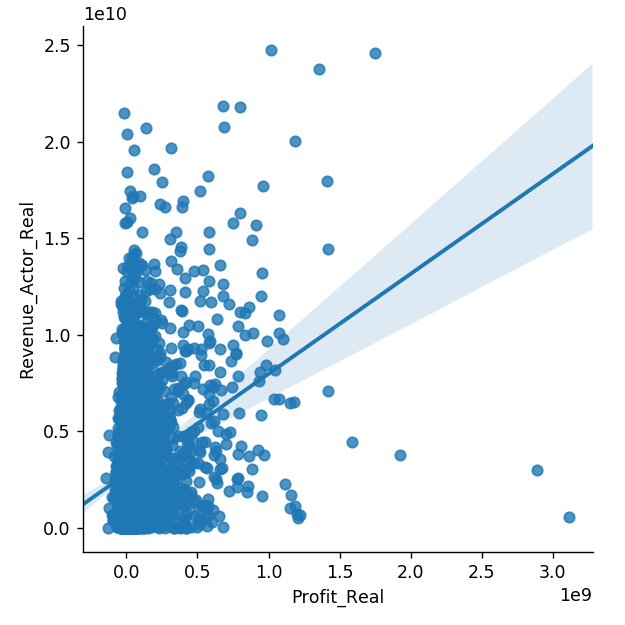

In [72]:
sns.pairplot(x_vars=["Profit_Real"], y_vars=["Revenue_Actor_Real"], data=test,  size=5, kind='reg')


<IPython.core.display.Javascript object>


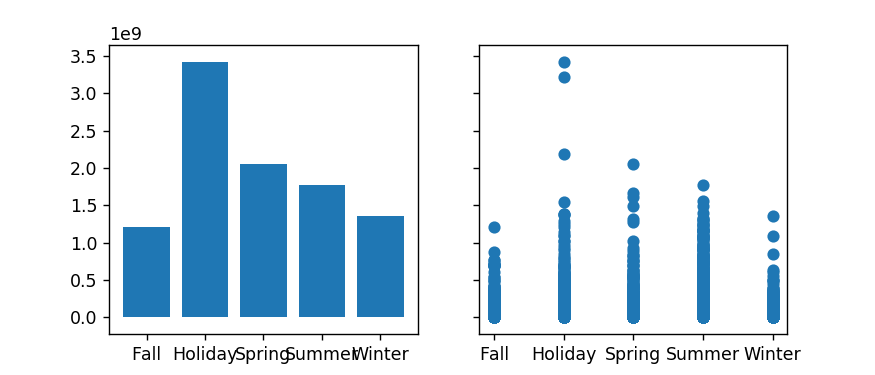

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
axs[0].bar(test['Season'], test['Revenue_Real'])
axs[1].scatter(test['Season'], test['Revenue_Real'])

<IPython.core.display.Javascript object>


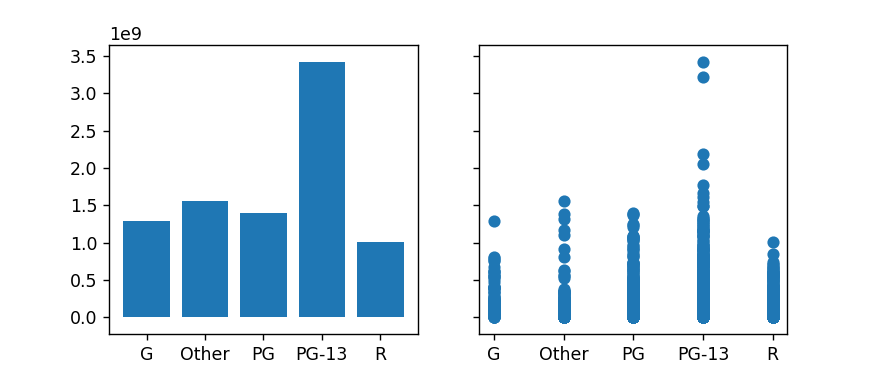

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axs[0].bar(test['Rated_category'], test['Revenue_Real'])
axs[1].scatter(test['Rated_category'], test['Revenue_Real'])

<IPython.core.display.Javascript object>


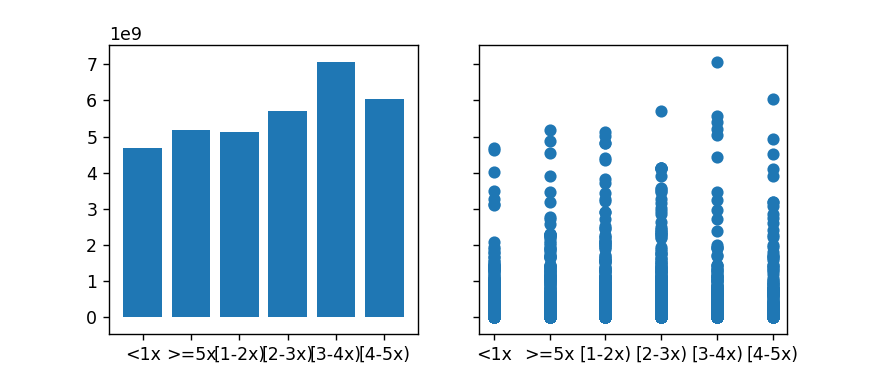

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axs[0].bar(test['Profit_Bucket'], test['Revenue_Director_Real'])
axs[1].scatter(test['Profit_Bucket'], test['Revenue_Director_Real'])

In [86]:
filter_col = [col for col in test if col.startswith('Comp_')]
filter_col

['Comp_Disney',
 'Comp_DreamWorks',
 'Comp_Fox',
 'Comp_Lionsgate',
 'Comp_MGM',
 'Comp_Miramax',
 'Comp_Paramount',
 'Comp_Sony',
 'Comp_Universal',
 'Comp_WarnerBros',
 'Comp_Other']

{'Disney': 80615698837.09206, 'DreamWorks': 29876091924.218876, 'Fox': 72642905893.08755, 'Lionsgate': 22201708675.802544, 'MGM': 17271320638.03645, 'Miramax': 9375170239.274246, 'Paramount': 50867110990.284424, 'Sony': 66245561430.691124, 'Universal': 69189142810.83623, 'WarnerBros': 93691194985.10196, 'Other': 425300779213.2212}


<IPython.core.display.Javascript object>


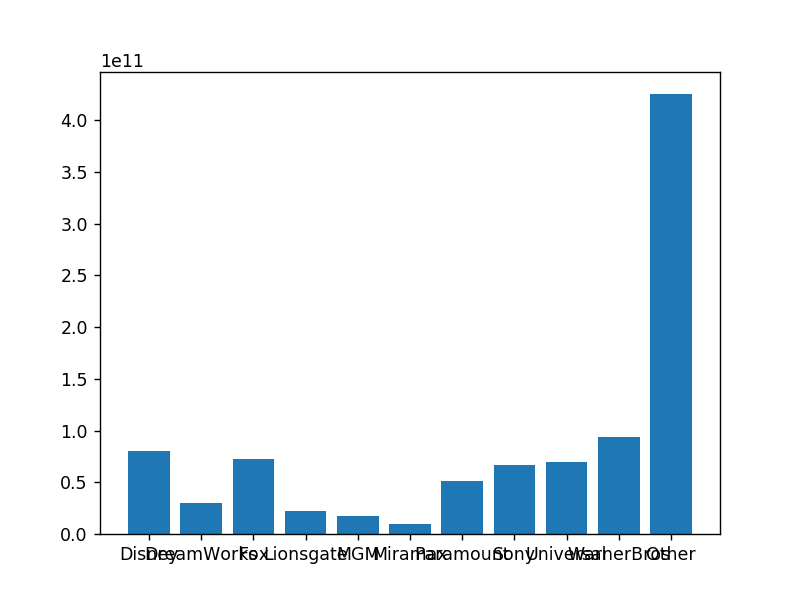

([<matplotlib.axis.XTick at 0xaa1f8c36d8>,
 <a list of 11 Text xticklabel objects>)

In [88]:
#Plot revenue by production company
#I haven't confirmed these findings with research yet.
count = 0
company_rev = {}
for name in filter_col:
    company_rev[name[5:]] = test.loc[test[name] == 1, 'Revenue_Real'].sum()
print(company_rev) 
plt.bar(range(len(company_rev)), company_rev.values(), align="center")
plt.xticks(range(len(company_rev)), list(company_rev.keys()))

In [50]:
filter_col = [col for col in test if col.startswith('Genre_')]
filter_col

['Genre_Drama',
 'Genre_Comedy',
 'Genre_Action_Adventure',
 'Genre_Thriller_Horror',
 'Genre_Romance',
 'Genre_Crime_Mystery',
 'Genre_Animation',
 'Genre_Scifi',
 'Genre_Documentary',
 'Genre_Other']

{'Drama': 2392, 'Comedy': 1725, 'Action_Adventure': 1419, 'Thriller_Horror': 1334, 'Romance': 959, 'Crime_Mystery': 1121, 'Animation': 244, 'Scifi': 479, 'Documentary': 130, 'Other': 1510}


<IPython.core.display.Javascript object>


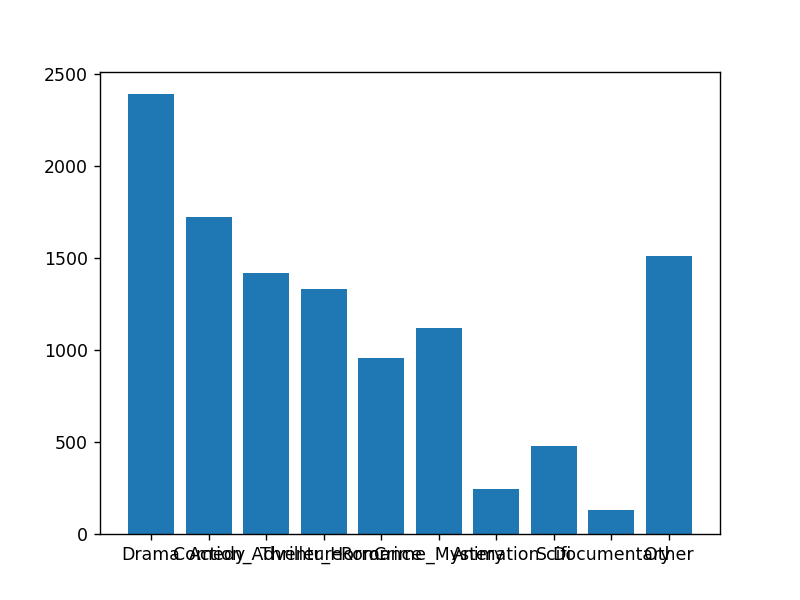

([<matplotlib.axis.XTick at 0xaa1885b978>,
 <a list of 10 Text xticklabel objects>)

In [62]:
#Plot revenue by production company
#I haven't confirmed these findings with research yet.
count = 0
genre_rev = {}
for name in filter_col:
    genre_rev[name[6:]] = test.loc[test[name] == 1, 'Revenue_Real'].count()
print(genre_rev) 
plt.bar(range(len(genre_rev)), genre_rev.values(), align="center")
plt.xticks(range(len(genre_rev)), list(genre_rev.keys()))

<1x       1842
[1-2x)     848
>=5x       691
[2-3x)     655
[3-4x)     368
[4-5x)     257
Name: Profit_Bucket, dtype: int64


<IPython.core.display.Javascript object>


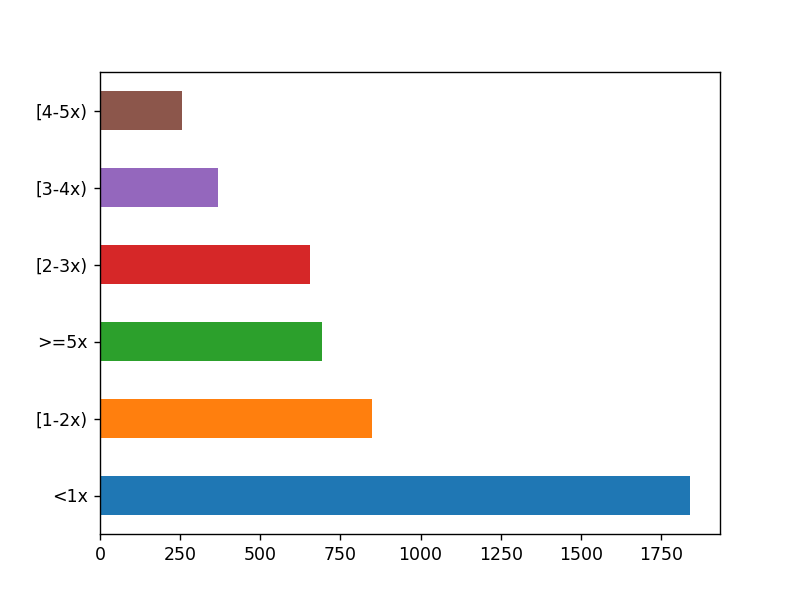

In [89]:
print(test['Profit_Bucket'].value_counts())
test['Profit_Bucket'].value_counts().plot(kind='barh')

0    2690
1    1971
Name: Profit_Bucket_Binary, dtype: int64


<IPython.core.display.Javascript object>


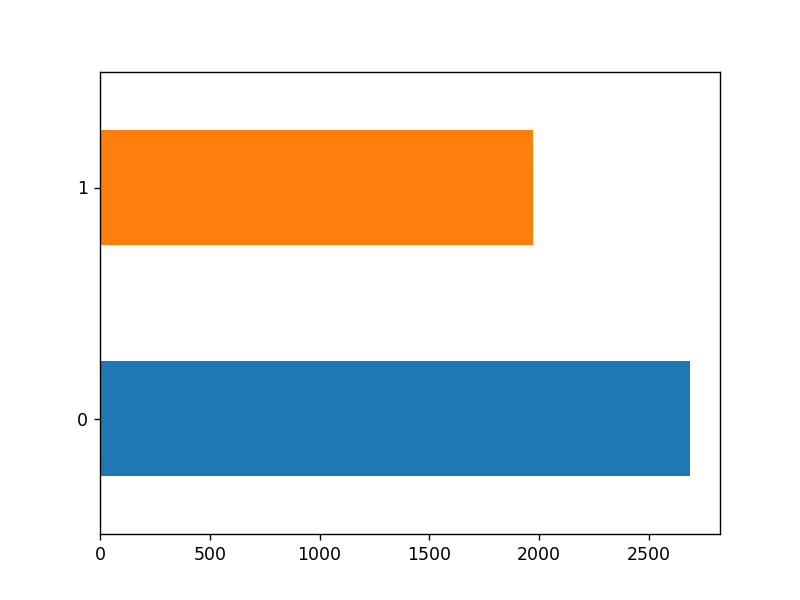

In [94]:
print(test['Profit_Bucket_Binary'].value_counts())
test['Profit_Bucket_Binary'].value_counts().plot(kind='barh')
#np.log(test['Revenue_Real']).plot(kind='hist')